In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plots.style.use('fivethirtyeight')
%matplotlib inline

The prevalence of mental health issues is 0.55 (data from 2017). Assumption we make (difference in years)

- Null Hypothesis: The probability that a tech employee surveyed having mental health issues is equivalent to the prevalence of mental health issues within the tech-workplace population. (i.e., any difference between the study prevalence and population prevalence is due to random chance in the selection of the participants)

- Alternative Hypothesis: The probability that tech employee surveyed having mental health issues is different than the prevalence of mental health issues within the tech-workplace population.


In [2]:
data_tech = pd.read_pickle('data_tech.pkl')

In [3]:
#Feature Engineering
data_tech['gender'] = data_tech['gender'].map({'Male': 1, 'Female': 2, 'Other': 3})
data_tech['family_history'] = data_tech['family_history'].map({'Yes': 1, 'No': 0})
data_tech['remote_work'] = data_tech['remote_work'].map({'Yes': 1, 'No': 0})
data_tech['self_employed'] = data_tech['self_employed'].map({'Yes': 1, 'No': 0})
data_tech['treatment'] = data_tech['treatment'].map({'Yes': 1, 'No': 0})

data_tech['mental_vs_physical'] = data_tech['mental_vs_physical'].map({'Yes': 1, 'No': 2, "Don't know": 3})
data_tech['issue'] = data_tech['issue'].map({'Yes': 1, 'No': 0})

In [4]:
observed = data_tech.loc[data_tech['issue'] == 1].shape[0]/(data_tech.shape[0])
print("Observed Prevalence:",observed) 
observed_distance = abs(observed - 0.55)
print("Observed Test Statistic:",observed_distance)
print("Prevalance: 0.55" )

Observed Prevalence: 0.786771964461994
Observed Test Statistic: 0.236771964461994
Prevalance: 0.55


In [5]:
issue_proportions = [.45, .55] # without and with issues

def issue_statistic():
    simulated_stat= np.random.multinomial(1000, issue_proportions, size=1)
    obs = simulated_stat[0][1]/1000
    abs_diff = abs(obs - 0.55)
    return abs_diff # statistic

x = issue_statistic()

In [6]:
# Here we want to get 10000 values for the test statistic, which forms an empirical distribution
issue_simulated_stats = []

for i in np.arange(10000): 
    issue_simulated_stats = np.append(issue_simulated_stats, issue_statistic())

print("\nSimulated Statistics:",issue_simulated_stats)


Simulated Statistics: [0.013 0.006 0.013 ... 0.012 0.007 0.014]


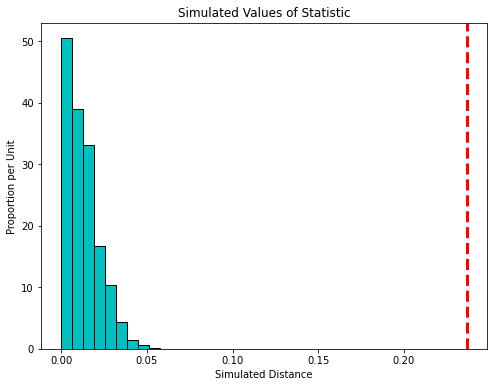

In [9]:
plt.figure(figsize=(8,6))
result = plt.hist(issue_simulated_stats, density=True, color='c', edgecolor='k')
plt.axvline(observed_distance, color='red', linestyle='dashed', linewidth=3)
plt.title('Simulated Values of Statistic')
plt.ylabel('Proportion per Unit')
plt.xlabel('Simulated Distance')
plt.show()

In [8]:
# P-value
print("P-value:",np.count_nonzero(issue_simulated_stats >= observed_distance)/10000)

P-value: 0.0


The <b>p-value</b> is a measure of the probability that an observed difference could have occurred just by random chance.
The p-value we get suggests it is not possible that the obversed difference could have occured by mere chance. In our <b>null hypothesis</b>, we suggested that the probabilities between an employee in the survey having mental health issues and and an employee in the population having mental health issues are equivalent, and any difference is due to chance only.
However, our statistical inference states otherwise. It urges us to <b>reject</b> the null hypothesis in favor of the <b>alternative</b>

#### Why could this have occured?

1) The data that we have is from 2014, and dominated by citizens in the United States. (Bias w.r.t demography, as well as age and gender)


2) The target label (whether an employee has mental health issues or not) was self-inferred and self-added to the dataset. There was no definite target variable in the dataset available prior to EDA and cleaning. We used 'No Response' from one of the important columns as an indicator whether an employee had mental health issues or not, and added a new feature which we labeled as 'issue'. The same feature was then used as our target, from where we derived our observed prevalence and thus the observed test statistics.  